In [44]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

import os
import numpy as np
import matplotlib.pyplot as plt

In [45]:
# X_train -> train images
## Y_train -> train labels
## X_test  -> test images
## Y_test  -> test labels

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [46]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

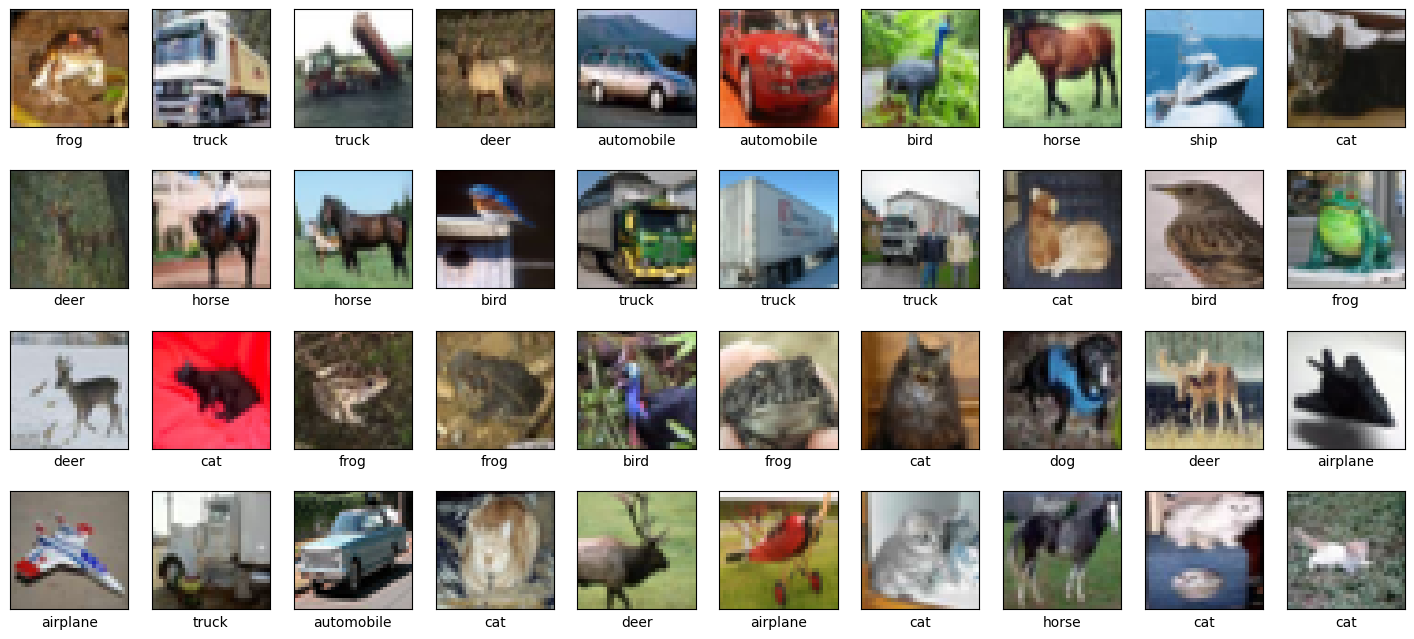

In [47]:
plt.figure(figsize=(18,8))
for i in range(40):
    plt.subplot(4, 10, i+1)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[Y_train[i][0]])

plt.show()

In [48]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [49]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l1_l2

model = keras.Sequential([
    ## input layer
    keras.Input(shape=(32, 32, 3)),

    layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),

    layers.Flatten(),

    layers.Dense(64, activation='relu'),

    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_18 (Bat  (None, 14, 14, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_19 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                      

In [50]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.00001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [51]:
h = model.fit(x=X_train, y=Y_train, epochs=30, validation_data=(X_test, Y_test), batch_size=64)

Epoch 1/30
782/782 [==============================] - 8s 7ms/step - loss: 2.7599 - accuracy: 0.1497 - val_loss: 2.3936 - val_accuracy: 0.2272
Epoch 2/30
782/782 [==============================] - 5s 7ms/step - loss: 2.2416 - accuracy: 0.2811 - val_loss: 2.1159 - val_accuracy: 0.3251
Epoch 3/30
782/782 [==============================] - 5s 6ms/step - loss: 2.0524 - accuracy: 0.3458 - val_loss: 1.9815 - val_accuracy: 0.3678
Epoch 4/30
782/782 [==============================] - 5s 7ms/step - loss: 1.9415 - accuracy: 0.3855 - val_loss: 1.8966 - val_accuracy: 0.3984
Epoch 5/30
782/782 [==============================] - 5s 6ms/step - loss: 1.8637 - accuracy: 0.4144 - val_loss: 1.8325 - val_accuracy: 0.4217
Epoch 6/30
782/782 [==============================] - 5s 6ms/step - loss: 1.7998 - accuracy: 0.4390 - val_loss: 1.7820 - val_accuracy: 0.4409
Epoch 7/30
782/782 [==============================] - 5s 7ms/step - loss: 1.7512 - accuracy: 0.4586 - val_loss: 1.7411 - val_accuracy: 0.4577
Epoch 

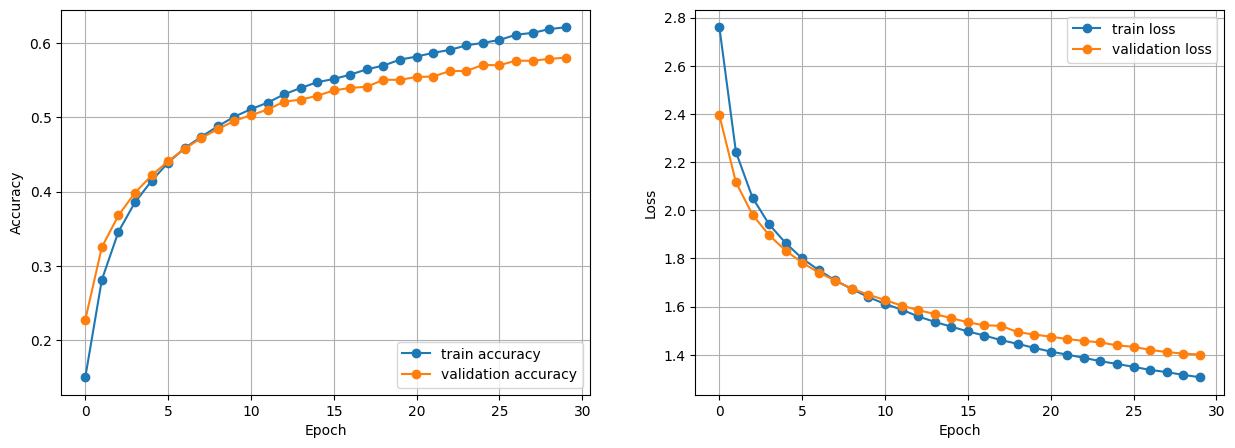

In [52]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [53]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 1.4009 - accuracy: 0.5805

Test Accuracy: 0.5805000066757202

Test Loss: 1.4009073972702026


In [54]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [55]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l1_l2

model2 = keras.Sequential([

    keras.Input(shape=(32, 32, 3)),
    layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    layers.Dense(10, activation='softmax')
])

model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_21 (Bat  (None, 14, 14, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_22 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                      

In [56]:
model2.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.00001, momentum=0.8),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [57]:
h = model2.fit(x=X_train, y=Y_train, epochs=30, validation_data=(X_test, Y_test), batch_size=64)

Epoch 1/30
782/782 [==============================] - 7s 7ms/step - loss: 2.7330 - accuracy: 0.1677 - val_loss: 2.5322 - val_accuracy: 0.1990
Epoch 2/30
782/782 [==============================] - 5s 6ms/step - loss: 2.5617 - accuracy: 0.1975 - val_loss: 2.5065 - val_accuracy: 0.2134
Epoch 3/30
782/782 [==============================] - 5s 6ms/step - loss: 2.4701 - accuracy: 0.2204 - val_loss: 2.4336 - val_accuracy: 0.2278
Epoch 4/30
782/782 [==============================] - 5s 7ms/step - loss: 2.4042 - accuracy: 0.2372 - val_loss: 2.3785 - val_accuracy: 0.2458
Epoch 5/30
782/782 [==============================] - 4s 6ms/step - loss: 2.3551 - accuracy: 0.2495 - val_loss: 2.3337 - val_accuracy: 0.2579
Epoch 6/30
782/782 [==============================] - 5s 6ms/step - loss: 2.3126 - accuracy: 0.2654 - val_loss: 2.2937 - val_accuracy: 0.2727
Epoch 7/30
782/782 [==============================] - 5s 7ms/step - loss: 2.2770 - accuracy: 0.2734 - val_loss: 2.2693 - val_accuracy: 0.2818
Epoch 

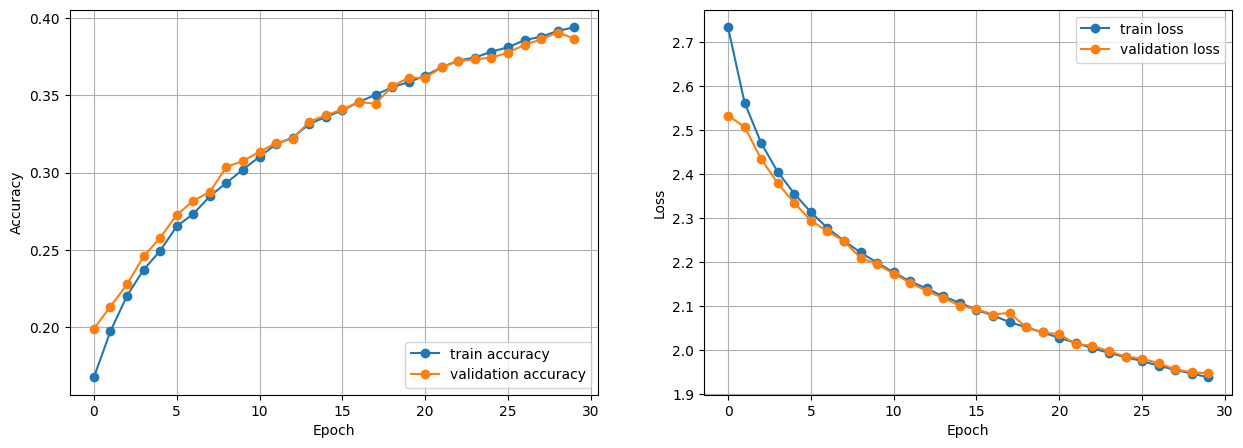

In [58]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [59]:
test_loss, test_acc = model2.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 1.9469 - accuracy: 0.3868

Test Accuracy: 0.38679999113082886

Test Loss: 1.9468590021133423


In [60]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l1_l2

model3 = keras.Sequential([

    keras.Input(shape=(32, 32, 3)),

    layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),

    layers.Flatten(),

    layers.Dense(64, activation='relu'),

    layers.Dense(10, activation='softmax')
])

model3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_24 (Bat  (None, 14, 14, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_25 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                      

In [61]:
model3.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.00001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [62]:
h = model3.fit(x=X_train, y=Y_train, epochs=30, validation_data=(X_test, Y_test), batch_size=64)

Epoch 1/30
782/782 [==============================] - 8s 7ms/step - loss: 4.6178 - accuracy: 0.1864 - val_loss: 4.3660 - val_accuracy: 0.2261
Epoch 2/30
782/782 [==============================] - 4s 6ms/step - loss: 4.1882 - accuracy: 0.3061 - val_loss: 4.0685 - val_accuracy: 0.3408
Epoch 3/30
782/782 [==============================] - 5s 6ms/step - loss: 3.9833 - accuracy: 0.3600 - val_loss: 3.8922 - val_accuracy: 0.3801
Epoch 4/30
782/782 [==============================] - 5s 6ms/step - loss: 3.8280 - accuracy: 0.3916 - val_loss: 3.7683 - val_accuracy: 0.4072
Epoch 5/30
782/782 [==============================] - 5s 6ms/step - loss: 3.6994 - accuracy: 0.4180 - val_loss: 3.6606 - val_accuracy: 0.4251
Epoch 6/30
782/782 [==============================] - 5s 6ms/step - loss: 3.5908 - accuracy: 0.4384 - val_loss: 3.5735 - val_accuracy: 0.4368
Epoch 7/30
782/782 [==============================] - 4s 6ms/step - loss: 3.4955 - accuracy: 0.4558 - val_loss: 3.4615 - val_accuracy: 0.4558
Epoch 

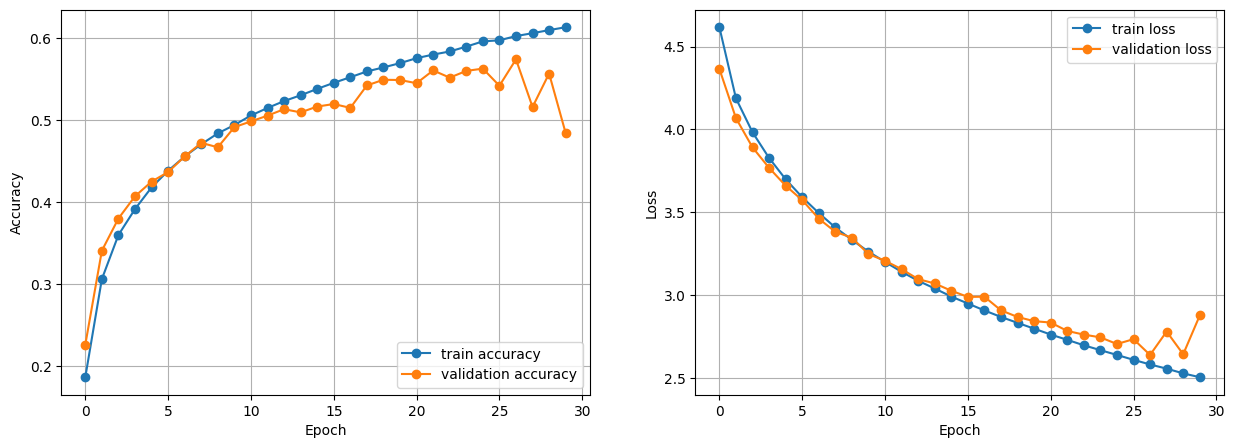

In [63]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [64]:
test_loss, test_acc = model3.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 2.8764 - accuracy: 0.4843

Test Accuracy: 0.48429998755455017

Test Loss: 2.8764355182647705


Here, we employed Adam, SGD, and RMSprop as our three optimizers.
We used the Adam optimizer and got the best accuracy and there were very less fluctuations.
We acquired lowest accuracy using SGD optimizer.Also, out of the three optimizers, this optimizer had the least fluctuations.
We almost simillar accuracy like Adam from the RMSprop optimizer. However, it fluctuated at the end most.
Out of the three optimizers, RMSprop and Adam performed quite similarly with the accuracy, whereas SGD performed differently with the accuracy rate.




